In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [ ]:
from datasets import load_dataset

imdb = load_dataset('imdb')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
print(imdb['train'])

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [ ]:
print(imdb['train'][0]['text'])

I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, eve

In [ ]:
print(imdb['train'][0]['label'])

0


In [ ]:
print(imdb['test'])

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [ ]:
train_data =imdb['train']['text']
train_label =imdb['train']['label']
test_data =imdb['test']['text']
test_label =imdb['test']['label']

In [ ]:
train_data[:3]

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

In [ ]:
# class 0 --> neg and 1 --> pos
train_label[:3]

[0, 0, 0]

# Text preprocessing



# Tokenization



In [ ]:
#using split() to split on whitespaces which is naive approach
# issues: with this approach all punctuations are preserved which will make the size of vocab --> sparse features and more memory
# 2. What other forms we account for: 'movie!', 'movie:',...etc. Those are different and unexpected morphologies.
example = train_data[0]
example.split()

['I',
 'rented',
 'I',
 'AM',
 'CURIOUS-YELLOW',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967.',
 'I',
 'also',
 'heard',
 'that',
 'at',
 'first',
 'it',
 'was',
 'seized',
 'by',
 'U.S.',
 'customs',
 'if',
 'it',
 'ever',
 'tried',
 'to',
 'enter',
 'this',
 'country,',
 'therefore',
 'being',
 'a',
 'fan',
 'of',
 'films',
 'considered',
 '"controversial"',
 'I',
 'really',
 'had',
 'to',
 'see',
 'this',
 'for',
 'myself.<br',
 '/><br',
 '/>The',
 'plot',
 'is',
 'centered',
 'around',
 'a',
 'young',
 'Swedish',
 'drama',
 'student',
 'named',
 'Lena',
 'who',
 'wants',
 'to',
 'learn',
 'everything',
 'she',
 'can',
 'about',
 'life.',
 'In',
 'particular',
 'she',
 'wants',
 'to',
 'focus',
 'her',
 'attentions',
 'to',
 'making',
 'some',
 'sort',
 'of',
 'documentary',
 'on',
 'what',
 'the',
 'average',
 'Swede',
 'thought',
 'about',
 'certai

In [ ]:
# using regex to split on one or more non-word characters to avoid perserving the punctuations
import re
regex = '\W+'
re.split(regex, example)

['I',
 'rented',
 'I',
 'AM',
 'CURIOUS',
 'YELLOW',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967',
 'I',
 'also',
 'heard',
 'that',
 'at',
 'first',
 'it',
 'was',
 'seized',
 'by',
 'U',
 'S',
 'customs',
 'if',
 'it',
 'ever',
 'tried',
 'to',
 'enter',
 'this',
 'country',
 'therefore',
 'being',
 'a',
 'fan',
 'of',
 'films',
 'considered',
 'controversial',
 'I',
 'really',
 'had',
 'to',
 'see',
 'this',
 'for',
 'myself',
 'br',
 'br',
 'The',
 'plot',
 'is',
 'centered',
 'around',
 'a',
 'young',
 'Swedish',
 'drama',
 'student',
 'named',
 'Lena',
 'who',
 'wants',
 'to',
 'learn',
 'everything',
 'she',
 'can',
 'about',
 'life',
 'In',
 'particular',
 'she',
 'wants',
 'to',
 'focus',
 'her',
 'attentions',
 'to',
 'making',
 'some',
 'sort',
 'of',
 'documentary',
 'on',
 'what',
 'the',
 'average',
 'Swede',
 'thought',
 'about',
 'certai

In [ ]:
# issues with regex approach that it may change the meaning of the sentence due to its approach on splitting
s=  'human-like robots are dump'
re.split(regex,s)

['human', 'like', 'robots', 'are', 'dump']

In [ ]:
# the question mark is removed, we donnot want to remove all the punctuations because in tasks like chatbot ? is important to understand that this is a question
# for sentiment analysis, those symbols might be the reason of classfication:'What a moview :)' , 'What a movie!'
s = "What's on your mind?"
re.split(regex, s)

['What', 's', 'on', 'your', 'mind', '']

In [ ]:
#split on whitespace & remove punctuation
s = 'human-like robots are dump'
words = [re.sub(r'[^\w\']', '', w) for w in s.split()]
print(words)
s = "What's on your mind?"
words = [re.sub(r'[^\w\']', '', w) for w in s.split()]
print(words)

['humanlike', 'robots', 'are', 'dump']
["What's", 'on', 'your', 'mind']


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# using nltk tokenizer
from nltk.tokenize import sent_tokenize
sent_tokenize(example) # sentence tokenizer

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967.',
 'I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life.',
 'In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States.',
 'In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic.',
 "Really, the sex and nudity scenes are few an

In [ ]:
nltk.tokenize.sent_tokenize(s)

["What's on your mind?"]

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize(s)

['What', "'s", 'on', 'your', 'mind', '?']

In [ ]:
word_tokenize('human-like robots are dump')

['human-like', 'robots', 'are', 'dump']

# Stop words
Not every word contribute to the semantics or meaning. Some words like 'the', 'to', 'on', 'we',...etc are not important for many tasks, specially classification tasks.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
# note that it is recommended to make normalization (lowercase) before applying the stopwords removal to ensure that all stop words are removed
s = 'The cat sat on the mat'
tokens = [word for word in word_tokenize(s) if word not in stop_words]
print(tokens)


['The', 'cat', 'sat', 'mat']


In [ ]:
# After applying the normalization
s = s.lower()
tokens = [word for word in word_tokenize(s) if word not in (stop_words)]
print(tokens)

['cat', 'sat', 'mat']


# stemming
Note that: stemming might produce meaningless words sometimes!
This is because, some prefix/suffix removal might also remove parts of the word
Also, notice how stemming automatically reduce to lower case.

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
s = 'the cats sat on the mats'
stems = [porter.stem(word) for word in word_tokenize(s)]
print(stems)

['the', 'cat', 'sat', 'on', 'the', 'mat']


In [ ]:
s = 'little girls went to the store'
stems = [porter.stem(word) for word in word_tokenize(s)]
print(stems)

['littl', 'girl', 'went', 'to', 'the', 'store']


# Lemmatization
Unlike stemming, lemmatization understand the root of the word in the language:

(am, is, are → be)

So not only the morphology is considered, but also the root. This has more importance in languages like Arabic (requires special lemmatizers and stemmers).

Either stem or lemmatize
There's no need to do both.

Actually stemming might make lemmatization not working.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# note that it reduced the nouns to its root but the verbs didnot change!
# it is because we need to specify for the lemmitizer that it should work on verbs or nouns by default it is a nouns
lemmatizer = WordNetLemmatizer()
s = 'The little girls went to the stores'
lemmas = [lemmatizer.lemmatize(word) for word in word_tokenize(s)] # The default is pos='n'
print(lemmas)

['The', 'little', 'girl', 'went', 'to', 'the', 'store']


In [ ]:
# verbs class
s = 'The little girls went to the stores'
lemmas = [lemmatizer.lemmatize(word,pos='v') for word in word_tokenize(s)]
print(lemmas)

['The', 'little', 'girls', 'go', 'to', 'the', 'store']


In [ ]:
# both
lemmas = [lemmatizer.lemmatize(word,pos='v') for word in (lemmatizer.lemmatize(word,pos='n') for word in word_tokenize(s))]
print(lemmas)

['The', 'little', 'girl', 'go', 'to', 'the', 'store']


# Part-of-speech (POS) tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
s = 'He is going on a journey fishing on ships'
tags = nltk.pos_tag(word_tokenize(s))
print(tags)

[('He', 'PRP'), ('is', 'VBZ'), ('going', 'VBG'), ('on', 'IN'), ('a', 'DT'), ('journey', 'NN'), ('fishing', 'NN'), ('on', 'IN'), ('ships', 'NNS')]


In [ ]:
from nltk.corpus import wordnet

In [ ]:
# you can specify which tag (class) to lemmitize based on it
s= "The quick brown foxes are jumping energetically over the lazy dogs while beautifully singing old songs."
print([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(s)])
print([lemmatizer.lemmatize(word,pos=wordnet.ADJ) for word in word_tokenize(s)])
print([lemmatizer.lemmatize(word,pos=wordnet.ADV) for word in word_tokenize(s)])
print([lemmatizer.lemmatize(word,pos=wordnet.NOUN) for word in word_tokenize(s)])

['The', 'quick', 'brown', 'fox', 'be', 'jump', 'energetically', 'over', 'the', 'lazy', 'dog', 'while', 'beautifully', 'sing', 'old', 'songs', '.']
['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'energetically', 'over', 'the', 'lazy', 'dogs', 'while', 'beautifully', 'singing', 'old', 'songs', '.']
['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'energetically', 'over', 'the', 'lazy', 'dogs', 'while', 'beautifully', 'singing', 'old', 'songs', '.']
['The', 'quick', 'brown', 'fox', 'are', 'jumping', 'energetically', 'over', 'the', 'lazy', 'dog', 'while', 'beautifully', 'singing', 'old', 'song', '.']


In [ ]:
# combine all
tags = [wordnet.VERB,wordnet.ADJ,wordnet.ADV,wordnet.NOUN]
tokens =  word_tokenize(s)
for tag in tags:
  print([lemmatizer.lemmatize(word,pos=tag) for word in tokens])
  print(nltk.pos_tag(tokens))

['The', 'quick', 'brown', 'fox', 'be', 'jump', 'energetically', 'over', 'the', 'lazy', 'dog', 'while', 'beautifully', 'sing', 'old', 'songs', '.']
[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('foxes', 'NNS'), ('are', 'VBP'), ('jumping', 'VBG'), ('energetically', 'RB'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dogs', 'NNS'), ('while', 'IN'), ('beautifully', 'RB'), ('singing', 'VBG'), ('old', 'JJ'), ('songs', 'NNS'), ('.', '.')]
['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'energetically', 'over', 'the', 'lazy', 'dogs', 'while', 'beautifully', 'singing', 'old', 'songs', '.']
[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('foxes', 'NNS'), ('are', 'VBP'), ('jumping', 'VBG'), ('energetically', 'RB'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dogs', 'NNS'), ('while', 'IN'), ('beautifully', 'RB'), ('singing', 'VBG'), ('old', 'JJ'), ('songs', 'NNS'), ('.', '.')]
['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'energetically', 'over', 'the', 'lazy', 'dogs',

# Data Cleaning

In [ ]:
 import unicodedata
 text = 'some text 😊'
 unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'some text '

In [ ]:
import re
import html
re1 = re.compile(r'  +')
def clean_html(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))

In [ ]:
example

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [ ]:
clean_html(example)

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.\n\nThe plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.\n\nWhat kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, even then it\'s no

# Final Processing Pipeline
Note that not all of these steps are suitable for all processing of models, you may not do all of this if you are working with certain models
for example, tranformers deal with raw data rather than this form
This pipeline is suitable for BoW model because all of this reduce the vocab vector size and reduce sparasity (because it treats all words as just words not including anything else)
So removing numbers, punctuations and lowercasing helps in Bow Model.

In [ ]:
def Tokenization(text):
  return word_tokenize(text)

def StopWords(tokens, stop_words):
  return [word for word in tokens if word not in stop_words]

def stemming(tokens):
  porter = PorterStemmer()
  return [porter.stem(word) for word in tokens]

def WordLemmatization(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word,pos='n') for word in tokens]

def VerbLemmatization(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word,pos='v') for word in tokens]

def LowerCase(tokens):
  return [word.lower() for word in tokens]

def RemovePunctuation(tokens):
  return [re.sub(r'[^\w\']', '', word) for word in tokens]

def RemoveWhitespaces(text):
    return text.strip()

def ReplaceNumbers(text):
    return re.sub(r'\d+', '', text)


def CleanHTML(x):
    re1 = re.compile(r'  +')
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))


def RemoveNonASCII(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def TextNormalization(text):
    text = CleanHTML(text)
    text = RemoveNonASCII(text)
    text = ReplaceNumbers(text)

    tokens = Tokenization(text)
    tokens = RemovePunctuation(tokens)
    tokens = LowerCase(tokens)
    cleaned_tokens = [word for word in tokens if word != '']

    tokens = StopWords(cleaned_tokens, stop_words)
    #stems = stemming(tokens) # Either Stemming or lemmatization
    lemmas = WordLemmatization(tokens)
    words = VerbLemmatization(lemmas)

    return words

def CorpusNormalization(corpus):
  return [TextNormalization(text) for text in corpus]

In [ ]:
TextNormalization(example)

['rent',
 'curiousyellow',
 'video',
 'store',
 'controversy',
 'surround',
 'first',
 'release',
 'also',
 'hear',
 'first',
 'seize',
 'u',
 'custom',
 'ever',
 'try',
 'enter',
 'country',
 'therefore',
 'fan',
 'film',
 'consider',
 'controversial',
 "''",
 'really',
 'see',
 'plot',
 'center',
 'around',
 'young',
 'swedish',
 'drama',
 'student',
 'name',
 'lena',
 'want',
 'learn',
 'everything',
 'life',
 'particular',
 'want',
 'focus',
 'attention',
 'make',
 'sort',
 'documentary',
 'average',
 'swede',
 'think',
 'certain',
 'political',
 'issue',
 'vietnam',
 'war',
 'race',
 'issue',
 'unite',
 'state',
 'ask',
 'politician',
 'ordinary',
 'denizen',
 'stockholm',
 'opinion',
 'politics',
 'sex',
 'drama',
 'teacher',
 'classmate',
 'marry',
 'men',
 'kill',
 'curiousyellow',
 'year',
 'ago',
 'consider',
 'pornographic',
 'really',
 'sex',
 'nudity',
 'scene',
 'far',
 'even',
 "'s",
 'shoot',
 'like',
 'cheaply',
 'make',
 'porno',
 'countryman',
 'mind',
 'find',
 'sho

In [ ]:
example

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [ ]:
# Apply to training data
norm_train = CorpusNormalization(train_data)

# Then apply same to test data (critical!)
norm_test = CorpusNormalization(test_data)

In [ ]:
print("Original:", train_data[0][:100], "...")
print("Normalized:", norm_train[0][:100], "...")

Original: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it w ...
Normalized: ['rent', 'curiousyellow', 'video', 'store', 'controversy', 'surround', 'first', 'release', 'also', 'hear', 'first', 'seize', 'u', 'custom', 'ever', 'try', 'enter', 'country', 'therefore', 'fan', 'film', 'consider', 'controversial', "''", 'really', 'see', 'plot', 'center', 'around', 'young', 'swedish', 'drama', 'student', 'name', 'lena', 'want', 'learn', 'everything', 'life', 'particular', 'want', 'focus', 'attention', 'make', 'sort', 'documentary', 'average', 'swede', 'think', 'certain', 'political', 'issue', 'vietnam', 'war', 'race', 'issue', 'unite', 'state', 'ask', 'politician', 'ordinary', 'denizen', 'stockholm', 'opinion', 'politics', 'sex', 'drama', 'teacher', 'classmate', 'marry', 'men', 'kill', 'curiousyellow', 'year', 'ago', 'consider', 'pornographic', 'really', 'sex', 'nudity', 'scene', 'far', 'even', "'s", 'shoot', 'like', 'cheaply', 'make', 'porno',

In [ ]:
norm_train[:3]

[['rent',
  'curiousyellow',
  'video',
  'store',
  'controversy',
  'surround',
  'first',
  'release',
  'also',
  'hear',
  'first',
  'seize',
  'u',
  'custom',
  'ever',
  'try',
  'enter',
  'country',
  'therefore',
  'fan',
  'film',
  'consider',
  'controversial',
  "''",
  'really',
  'see',
  'plot',
  'center',
  'around',
  'young',
  'swedish',
  'drama',
  'student',
  'name',
  'lena',
  'want',
  'learn',
  'everything',
  'life',
  'particular',
  'want',
  'focus',
  'attention',
  'make',
  'sort',
  'documentary',
  'average',
  'swede',
  'think',
  'certain',
  'political',
  'issue',
  'vietnam',
  'war',
  'race',
  'issue',
  'unite',
  'state',
  'ask',
  'politician',
  'ordinary',
  'denizen',
  'stockholm',
  'opinion',
  'politics',
  'sex',
  'drama',
  'teacher',
  'classmate',
  'marry',
  'men',
  'kill',
  'curiousyellow',
  'year',
  'ago',
  'consider',
  'pornographic',
  'really',
  'sex',
  'nudity',
  'scene',
  'far',
  'even',
  "'s",
  's

# Vectorization (Convert Text to Numbers)

#  Basic Bag-of-Words (BoW)

In [ ]:
# see the effect of data preprocessing
corpus = train_data + test_data
token = [word for text in corpus for word in Tokenization(text)]
print(token[:10])

['I', 'rented', 'I', 'AM', 'CURIOUS-YELLOW', 'from', 'my', 'video', 'store', 'because']


In [ ]:
vocab_vector = sorted(list(set(token)))
vocab_vector

['\x08\x08\x08\x08A',
 '\x10own',
 '!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'-",
 "'-Die",
 "'-movies",
 "'.",
 "'007",
 "'00s",
 "'01",
 "'02",
 "'03",
 "'04",
 "'05",
 "'06",
 "'06.",
 "'07",
 "'08",
 "'10",
 "'10'.",
 "'10-foot-bargepole",
 "'10.5",
 "'12",
 "'1408",
 "'15",
 "'1902",
 "'1909",
 "'1940",
 "'1947",
 "'1968",
 "'1st",
 "'20",
 "'2001",
 "'20s",
 "'20s-inspired",
 "'20th",
 "'24",
 "'28",
 "'30",
 "'30's.",
 "'30s",
 "'30s-'40s",
 "'30s-Ray",
 "'30s-early",
 "'30s.",
 "'30s/'40s",
 "'32",
 "'33",
 "'34",
 "'36",
 "'38",
 "'39",
 "'3rd",
 "'40",
 "'40's/'50",
 "'40s",
 "'41",
 "'42",
 "'42.",
 "'42nd",
 "'43",
 "'44",
 "'45",
 "'46",
 "'47",
 "'48",
 "'4th",
 "'50",
 "'50s",
 "'50s-'60s",
 "'50s.",
 "'50s/early",
 "'51",
 "'53",
 "'54",
 "'54-'55",
 "'55",
 "'56",
 "'57",
 "'58",
 "'59",
 "'60",
 "'60's/'70",
 "'60ies",
 "'60s",
 "'60s-early",
 "'60s.",
 "'60s/",
 "'60s/'70s",
 "'60s/early",
 "'60´s",
 "'61",
 "'62",
 "'63",
 "'64",
 "'65",
 "'66",
 "'666",
 "'67",
 

In [ ]:
#It's advised to fit the tokenizer on all the data (train+test) to avoid OOV
#This is not "cheating" and not leading to overfitting, as we don't use the test labels, but only the raw text features (unsupervised)
corpus = norm_train + norm_test

In [ ]:
print(corpus[:10])

[['rent', 'curiousyellow', 'video', 'store', 'controversy', 'surround', 'first', 'release', 'also', 'hear', 'first', 'seize', 'u', 'custom', 'ever', 'try', 'enter', 'country', 'therefore', 'fan', 'film', 'consider', 'controversial', "''", 'really', 'see', 'plot', 'center', 'around', 'young', 'swedish', 'drama', 'student', 'name', 'lena', 'want', 'learn', 'everything', 'life', 'particular', 'want', 'focus', 'attention', 'make', 'sort', 'documentary', 'average', 'swede', 'think', 'certain', 'political', 'issue', 'vietnam', 'war', 'race', 'issue', 'unite', 'state', 'ask', 'politician', 'ordinary', 'denizen', 'stockholm', 'opinion', 'politics', 'sex', 'drama', 'teacher', 'classmate', 'marry', 'men', 'kill', 'curiousyellow', 'year', 'ago', 'consider', 'pornographic', 'really', 'sex', 'nudity', 'scene', 'far', 'even', "'s", 'shoot', 'like', 'cheaply', 'make', 'porno', 'countryman', 'mind', 'find', 'shock', 'reality', 'sex', 'nudity', 'major', 'staple', 'swedish', 'cinema', 'even', 'ingmar', 

In [ ]:
flattened_corpus = [word for doc in corpus for word in doc]
vocab_vector = sorted(list(set(flattened_corpus)))
print(vocab_vector)

["'", "''", "''the", "'aaaaagh", "'aaaaaw", "'aakrosh", "'aankhen", "'aankhen'", "'aasmaan", "'aavjo", "'abandon", "'abbot", "'able", "'abolitionist", "'abolitionists", "'about", "'above", "'absence", "'absolutely", "'absorbed", "'acacia", "'academy", "'acceptable", "'accessible", "'accident", "'accidental", "'accidentally", "'accidently", "'accidents", "'acclaimed", "'accuracies", "'accurate", "'ace", "'achcha", "'achillies", "'ack", "'acrobatty", "'act", "'acting", "'action", "'action'", "'actionadventure", "'actionepic", "'activate", "'actor", "'actorly", "'actors", "'actress", "'actresses", "'acts", "'actual", "'ad", "'adam", "'adamfontaine", "'adaptations", "'addictedyou", "'addiction", "'additional", "'adelaide", "'admire", "'adolescent", "'adopted", "'adopting", "'adopts", "'adorably", "'adult", "'adulthood", "'adventure", "'adventurer", "'adventures", "'adviser", "'advisor", "'aeryn", "'af", "'afraid", "'africa", "'after", "'aftermath", "'afternoon", "'agar", "'agony", "'aguirr

In [ ]:
# Mapping from String to index
def StringToIndex(v):
  return {word:idx+2 for idx,word in enumerate(v)}

In [ ]:
StrToIdx=  StringToIndex(vocab_vector)
StrToIdx

{"'": 2,
 "''": 3,
 "''the": 4,
 "'aaaaagh": 5,
 "'aaaaaw": 6,
 "'aakrosh": 7,
 "'aankhen": 8,
 "'aankhen'": 9,
 "'aasmaan": 10,
 "'aavjo": 11,
 "'abandon": 12,
 "'abbot": 13,
 "'able": 14,
 "'abolitionist": 15,
 "'abolitionists": 16,
 "'about": 17,
 "'above": 18,
 "'absence": 19,
 "'absolutely": 20,
 "'absorbed": 21,
 "'acacia": 22,
 "'academy": 23,
 "'acceptable": 24,
 "'accessible": 25,
 "'accident": 26,
 "'accidental": 27,
 "'accidentally": 28,
 "'accidently": 29,
 "'accidents": 30,
 "'acclaimed": 31,
 "'accuracies": 32,
 "'accurate": 33,
 "'ace": 34,
 "'achcha": 35,
 "'achillies": 36,
 "'ack": 37,
 "'acrobatty": 38,
 "'act": 39,
 "'acting": 40,
 "'action": 41,
 "'action'": 42,
 "'actionadventure": 43,
 "'actionepic": 44,
 "'activate": 45,
 "'actor": 46,
 "'actorly": 47,
 "'actors": 48,
 "'actress": 49,
 "'actresses": 50,
 "'acts": 51,
 "'actual": 52,
 "'ad": 53,
 "'adam": 54,
 "'adamfontaine": 55,
 "'adaptations": 56,
 "'addictedyou": 57,
 "'addiction": 58,
 "'additional": 59,
 "'

In [ ]:
# mapping from Index to string
def IndexToString(v):
  return {idx+2:word for idx,word in enumerate(v)}

In [ ]:
IdxToStr =  IndexToString(vocab_vector)
IdxToStr

{2: "'",
 3: "''",
 4: "''the",
 5: "'aaaaagh",
 6: "'aaaaaw",
 7: "'aakrosh",
 8: "'aankhen",
 9: "'aankhen'",
 10: "'aasmaan",
 11: "'aavjo",
 12: "'abandon",
 13: "'abbot",
 14: "'able",
 15: "'abolitionist",
 16: "'abolitionists",
 17: "'about",
 18: "'above",
 19: "'absence",
 20: "'absolutely",
 21: "'absorbed",
 22: "'acacia",
 23: "'academy",
 24: "'acceptable",
 25: "'accessible",
 26: "'accident",
 27: "'accidental",
 28: "'accidentally",
 29: "'accidently",
 30: "'accidents",
 31: "'acclaimed",
 32: "'accuracies",
 33: "'accurate",
 34: "'ace",
 35: "'achcha",
 36: "'achillies",
 37: "'ack",
 38: "'acrobatty",
 39: "'act",
 40: "'acting",
 41: "'action",
 42: "'action'",
 43: "'actionadventure",
 44: "'actionepic",
 45: "'activate",
 46: "'actor",
 47: "'actorly",
 48: "'actors",
 49: "'actress",
 50: "'actresses",
 51: "'acts",
 52: "'actual",
 53: "'ad",
 54: "'adam",
 55: "'adamfontaine",
 56: "'adaptations",
 57: "'addictedyou",
 58: "'addiction",
 59: "'additional",
 60

In [ ]:
from collections import Counter
flattened_corpus = [word for doc in corpus for word in doc]
word_counts = Counter(flattened_corpus)
print(word_counts.most_common(10))

[("'s", 122559), ('movie', 101629), ('film', 94427), ("n't", 66395), ("''", 65726), ('one', 54068), ('make', 44283), ('like', 43384), ('see', 41267), ('get', 35582)]


In [ ]:
sorted_vocab_vector= sorted(word_counts, key=word_counts.get, reverse=True)
sorted_vocab_vector

["'s",
 'movie',
 'film',
 "n't",
 "''",
 'one',
 'make',
 'like',
 'see',
 'get',
 'time',
 'good',
 'character',
 'watch',
 'go',
 'would',
 'even',
 'story',
 'think',
 'really',
 'show',
 'scene',
 "'",
 'well',
 'look',
 'say',
 'much',
 'know',
 'end',
 'could',
 'people',
 'great',
 'bad',
 'also',
 'give',
 'first',
 'take',
 'act',
 'play',
 'way',
 'love',
 'thing',
 'come',
 'find',
 'life',
 'seem',
 'work',
 'many',
 'plot',
 'actor',
 'want',
 'two',
 'never',
 'year',
 'best',
 'try',
 'little',
 'ever',
 'better',
 'man',
 'still',
 'part',
 'feel',
 "'ve",
 'something',
 'lot',
 'back',
 'interest',
 "'m",
 'director',
 'guy',
 'real',
 'performance',
 'use',
 'woman',
 'though',
 'funny',
 'cast',
 'another',
 'actually',
 'nothing',
 'role',
 'tell',
 'u',
 'start',
 'star',
 'new',
 'every',
 'shoot',
 'old',
 'point',
 'write',
 'girl',
 'set',
 'become',
 'world',
 'turn',
 'day',
 "'re",
 'minute',
 'kill',
 'fact',
 'quite',
 'pretty',
 'leave',
 'happen',
 'aro

In [ ]:
special_tokens = ["<PAD>", "<UNK>"]
StrToIndex = StringToIndex(sorted_vocab_vector)
StrToIndex["<PAD>"] = 0
StrToIndex["<UNK>"] = 1
IdxToStr = {i: word for word, i in StrToIndex.items()}

In [ ]:
StrToIndex["<PAD>"] , IdxToStr[0]

(0, '<PAD>')

In [ ]:
StrToIndex["<UNK>"] , IdxToStr[1]

(1, '<UNK>')

In [ ]:
print(StrToIndex)

{"'s": 2, 'movie': 3, 'film': 4, "n't": 5, "''": 6, 'one': 7, 'make': 8, 'like': 9, 'see': 10, 'get': 11, 'time': 12, 'good': 13, 'character': 14, 'watch': 15, 'go': 16, 'would': 17, 'even': 18, 'story': 19, 'think': 20, 'really': 21, 'show': 22, 'scene': 23, "'": 24, 'well': 25, 'look': 26, 'say': 27, 'much': 28, 'know': 29, 'end': 30, 'could': 31, 'people': 32, 'great': 33, 'bad': 34, 'also': 35, 'give': 36, 'first': 37, 'take': 38, 'act': 39, 'play': 40, 'way': 41, 'love': 42, 'thing': 43, 'come': 44, 'find': 45, 'life': 46, 'seem': 47, 'work': 48, 'many': 49, 'plot': 50, 'actor': 51, 'want': 52, 'two': 53, 'never': 54, 'year': 55, 'best': 56, 'try': 57, 'little': 58, 'ever': 59, 'better': 60, 'man': 61, 'still': 62, 'part': 63, 'feel': 64, "'ve": 65, 'something': 66, 'lot': 67, 'back': 68, 'interest': 69, "'m": 70, 'director': 71, 'guy': 72, 'real': 73, 'performance': 74, 'use': 75, 'woman': 76, 'though': 77, 'funny': 78, 'cast': 79, 'another': 80, 'actually': 81, 'nothing': 82, 'r

In [ ]:
print(IdxToStr)

{2: "'s", 3: 'movie', 4: 'film', 5: "n't", 6: "''", 7: 'one', 8: 'make', 9: 'like', 10: 'see', 11: 'get', 12: 'time', 13: 'good', 14: 'character', 15: 'watch', 16: 'go', 17: 'would', 18: 'even', 19: 'story', 20: 'think', 21: 'really', 22: 'show', 23: 'scene', 24: "'", 25: 'well', 26: 'look', 27: 'say', 28: 'much', 29: 'know', 30: 'end', 31: 'could', 32: 'people', 33: 'great', 34: 'bad', 35: 'also', 36: 'give', 37: 'first', 38: 'take', 39: 'act', 40: 'play', 41: 'way', 42: 'love', 43: 'thing', 44: 'come', 45: 'find', 46: 'life', 47: 'seem', 48: 'work', 49: 'many', 50: 'plot', 51: 'actor', 52: 'want', 53: 'two', 54: 'never', 55: 'year', 56: 'best', 57: 'try', 58: 'little', 59: 'ever', 60: 'better', 61: 'man', 62: 'still', 63: 'part', 64: 'feel', 65: "'ve", 66: 'something', 67: 'lot', 68: 'back', 69: 'interest', 70: "'m", 71: 'director', 72: 'guy', 73: 'real', 74: 'performance', 75: 'use', 76: 'woman', 77: 'though', 78: 'funny', 79: 'cast', 80: 'another', 81: 'actually', 82: 'nothing', 83

In [ ]:
docs = ['cartoon movie show', 'hello world']
l = [[StrToIndex[w] for w in s.split()] for s in docs]
l

[[678, 3, 22], [4159, 97]]

In [ ]:
s = [' '.join([IdxToStr[i] for i in d]) for d in l]
s

['cartoon movie show', 'hello world']

In [ ]:
def text_to_indices(tokens, str_to_idx):
    return [str_to_idx.get(word, str_to_idx["<UNK>"]) for word in tokens] # this to map each word to its index, if it is oov map it to unkown

In [ ]:
s = 'The cartoon movie show' # the isnot in the vocab vector so it is mapped to the <unk> index which is 1
indicies = text_to_indices(Tokenization(s), StrToIndex)
indicies

[1, 678, 3, 22]

In [ ]:
import numpy as np
def bow_vector(tokens, str_to_idx, vocab_size):
    vec = np.zeros(vocab_size, dtype=int)
    indices = text_to_indices(tokens, str_to_idx)
    for index in indices:
        vec[index] += 1
    return vec

In [ ]:
example = norm_train[0]

In [ ]:
vocab_size = len(StrToIndex)
bow_representation = bow_vector(example, StrToIndex, vocab_size)
print(bow_representation)


[0 0 1 ... 0 0 0]


In [ ]:
print(type(train_data[0]))
print(type(norm_train[0]))

<class 'str'>
<class 'list'>


In [ ]:
len(StrToIndex)

119540

In [ ]:
# Convert tokenized data into BoW vectors
vocab_size = len(StrToIndex)
bow_matrix = np.array([bow_vector(doc, StrToIndex, vocab_size) for doc in norm_train[:10]])

In [ ]:
bow_matrix

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  3, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0]])

In [ ]:
bow_matrix.shape

(10, 119540)

In [ ]:
# Count - based Bow using Sklearn
from sklearn.feature_extraction.text import CountVectorizer
norm_train_strings = [" ".join(words) for words in norm_train]

vectorizer = CountVectorizer()
vectorizer.fit(norm_train_strings)
bow_mat = vectorizer.transform(norm_train_strings[:10])

In [ ]:
print(bow_mat.shape)

(10, 77387)


In [ ]:
bow_mat

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 933 stored elements and shape (10, 77387)>

In [ ]:
bow_mat.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(vectorizer.vocabulary_)

77387

In [ ]:
vectorizer.vocabulary_

{'rent': 56221,
 'curiousyellow': 15270,
 'video': 73285,
 'store': 64953,
 'controversy': 13785,
 'surround': 66283,
 'first': 23983,
 'release': 56035,
 'also': 1951,
 'hear': 29846,
 'seize': 59832,
 'custom': 15336,
 'ever': 21658,
 'try': 70209,
 'enter': 21008,
 'country': 14291,
 'therefore': 68062,
 'fan': 22734,
 'film': 23678,
 'consider': 13554,
 'controversial': 13781,
 'really': 55381,
 'see': 59737,
 'plot': 51863,
 'center': 10675,
 'around': 3609,
 'young': 76849,
 'swedish': 66475,
 'drama': 18943,
 'student': 65348,
 'name': 45418,
 'lena': 38211,
 'want': 74103,
 'learn': 37981,
 'everything': 21744,
 'life': 38576,
 'particular': 50087,
 'focus': 24491,
 'attention': 4172,
 'make': 40541,
 'sort': 63397,
 'documentary': 18278,
 'average': 4463,
 'swede': 66472,
 'think': 68174,
 'certain': 10713,
 'political': 52141,
 'issue': 34348,
 'vietnam': 73349,
 'war': 74115,
 'race': 54672,
 'unite': 71799,
 'state': 64476,
 'ask': 3866,
 'politician': 52154,
 'ordinary': 4

In [ ]:
# Binary - based Bow using Sklearn
vectorizer = CountVectorizer(binary = True)
vectorizer.fit(norm_train_strings)
binary_bow = vectorizer.transform(norm_train_strings[:10])

In [ ]:
binary_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(norm_train_strings)
tf_idf_bow = vectorizer.transform(norm_train_strings[:10])

In [ ]:
tf_idf_bow.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Padding in NLP
Purpose of Padding:

Used to normalize input vectors (e.g., sentences, sequences) to a fixed length for batch processing in neural networks.

Potential Issue with Using Max Length:

If padding is set to the longest sequence in the dataset, it may lead to inefficiency because:

The longest sequence could be an outlier, causing unnecessary padding for all other sequences.

Excess padding increases computational cost and memory usage.

Recommended Approaches:

Set a Practical Threshold:

Choose a reasonable length (e.g., 95th or 99th percentile) instead of the absolute max.

Balances efficiency and coverage of most data.

Analyze Length Distribution:

Create a histogram of sequence lengths to determine a suitable cutoff.

Helps avoid over-padding while capturing most meaningful data.

Handling Outliers:

Sequences longer than the threshold can be truncated (if acceptable for the task).

Note that Padding can be performed on texts before or after binarization. However, it's better to be done after binarization since we pad 0's which won't be understood by the vocab during binarization

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
sequences = [torch.tensor([1, 2, 3]), torch.tensor([4, 5]), torch.tensor([6])]
padded = pad_sequence(sequences, batch_first=True, padding_value=0)

In [ ]:
padded

tensor([[1, 2, 3],
        [4, 5, 0],
        [6, 0, 0]])

In [ ]:
padded = pad_sequence(sequences, batch_first=False, padding_value=0)

In [ ]:
padded

tensor([[1, 4, 6],
        [2, 5, 0],
        [3, 0, 0]])

# Binary BoW

In [ ]:
norm_train_strings = [" ".join(words) for words in norm_train]
norm_test_strings = [" ".join(words) for words in norm_test]

In [ ]:
vectorizer = CountVectorizer(binary = True)
vectorizer.fit(norm_train_strings + norm_test_strings)

CountVectorizer(binary=True)

In [ ]:
X_train= vectorizer.transform(norm_train_strings)
X_test = vectorizer.transform(norm_test_strings)

In [ ]:
train_label[:20]  # no shuffle!

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 115301)
(25000,)
(25000, 115301)
(25000,)


# Model

In [ ]:
import torch
import torch.nn as nn

class BoWClassifier(nn.Module):
  def __init__(self, vocab_size,hidden_dim):
    super().__init__()
    self.lin1 = nn.Linear(vocab_size,hidden_dim )
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(hidden_dim, hidden_dim)
    self.lin3 = nn.Linear(hidden_dim, 1)
    self.sig = nn.Sigmoid()
  def forward(self, x):
    x = self.lin1(x)
    x = self.relu(x)
    x = self.lin2(x)
    x = self.relu(x)
    x= self.lin3(x)
    x = self.sig(x)
    return x


In [ ]:
print(type(X_train))

<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

In [ ]:
from scipy.sparse import csr_matrix
from torch.utils.data import DataLoader
batch_size = 512

coo = X_train.tocoo()
indices = torch.stack([torch.tensor(coo.row), torch.tensor(coo.col)])
values = torch.tensor(coo.data, dtype=torch.float32)
shape = coo.shape

X_train_sparse = torch.sparse_coo_tensor(indices, values, shape)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

class SparseDataset(torch.utils.data.Dataset):
    def __init__(self, sparse_features, labels):
        self.features = sparse_features
        self.labels = labels

    def __len__(self):
        return self.labels.shape[0]

    def __getitem__(self, idx):
        return self.features[idx].to_dense(), self.labels[idx]


train_dataset = SparseDataset(X_train_sparse, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
print(X_train_sparse.shape)

torch.Size([15000, 115301])


In [ ]:
coo = X_val.tocoo()
indices = torch.stack([torch.tensor(coo.row), torch.tensor(coo.col)])
values = torch.tensor(coo.data, dtype=torch.float32)
shape = coo.shape

X_val_sparse = torch.sparse_coo_tensor(indices, values, shape)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
val_dataset = SparseDataset(X_val_sparse, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


In [ ]:
input_dim = X_train_sparse.shape[1]
hidden_dim = 16
model = BoWClassifier(input_dim,hidden_dim)

In [ ]:
learning_rate = 0.001
loss_function = nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters(),lr=learning_rate)

In [ ]:
model

BoWClassifier(
  (lin1): Linear(in_features=115301, out_features=16, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=16, out_features=16, bias=True)
  (lin3): Linear(in_features=16, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [ ]:
def binary_accuracy(y_pred, y_true):
    y_pred_rounded = torch.round(y_pred)
    correct = (y_pred_rounded == y_true).float()
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
epochs = 20
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

for epoch in range(epochs):
    # Training phase
    model.train()
    epoch_loss = 0.0
    epoch_acc = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = loss_function(outputs, y_batch)
        acc = binary_accuracy(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_outputs = model(X_val_batch).squeeze()
            val_loss += loss_function(val_outputs, y_val_batch).item()
            val_acc += binary_accuracy(val_outputs, y_val_batch).item()

    # Record metrics
    history['loss'].append(epoch_loss / len(train_loader))
    history['accuracy'].append(epoch_acc / len(train_loader))
    history['val_loss'].append(val_loss / len(val_loader))
    history['val_accuracy'].append(val_acc / len(val_loader))

    print(f"Epoch {epoch+1}:")
    print(f"  Loss: {history['loss'][-1]:.4f} | Accuracy: {history['accuracy'][-1]:.4f}")
    print(f"  Val Loss: {history['val_loss'][-1]:.4f} | Val Accuracy: {history['val_accuracy'][-1]:.4f}")

Epoch 1:
  Loss: 0.4700 | Accuracy: 0.8183
  Val Loss: 0.3304 | Val Accuracy: 0.8857
Epoch 2:
  Loss: 0.2144 | Accuracy: 0.9361
  Val Loss: 0.2898 | Val Accuracy: 0.8878
Epoch 3:
  Loss: 0.1321 | Accuracy: 0.9624
  Val Loss: 0.2790 | Val Accuracy: 0.8934
Epoch 4:
  Loss: 0.0868 | Accuracy: 0.9776
  Val Loss: 0.2880 | Val Accuracy: 0.8920
Epoch 5:
  Loss: 0.0580 | Accuracy: 0.9881
  Val Loss: 0.3056 | Val Accuracy: 0.8902
Epoch 6:
  Loss: 0.0393 | Accuracy: 0.9927
  Val Loss: 0.3322 | Val Accuracy: 0.8859
Epoch 7:
  Loss: 0.0280 | Accuracy: 0.9961
  Val Loss: 0.3681 | Val Accuracy: 0.8831
Epoch 8:
  Loss: 0.0194 | Accuracy: 0.9980
  Val Loss: 0.3887 | Val Accuracy: 0.8832
Epoch 9:
  Loss: 0.0140 | Accuracy: 0.9988
  Val Loss: 0.4301 | Val Accuracy: 0.8809
Epoch 10:
  Loss: 0.0104 | Accuracy: 0.9993
  Val Loss: 0.4504 | Val Accuracy: 0.8807
Epoch 11:
  Loss: 0.0077 | Accuracy: 0.9995
  Val Loss: 0.4707 | Val Accuracy: 0.8789
Epoch 12:
  Loss: 0.0055 | Accuracy: 0.9995
  Val Loss: 0.4929 

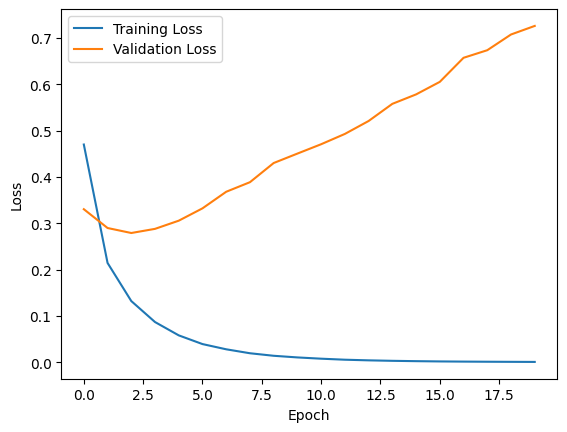

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

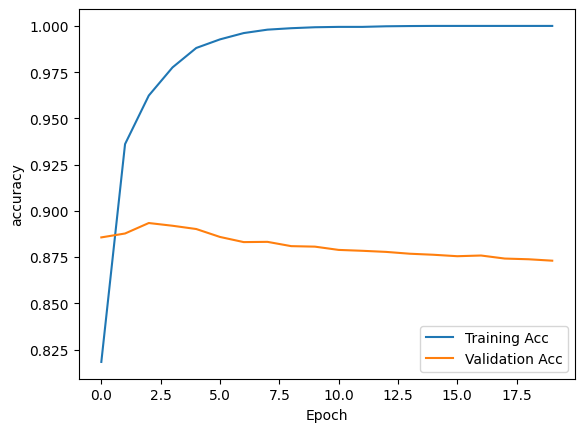

In [ ]:
plt.plot(history['accuracy'], label='Training Acc')
plt.plot(history['val_accuracy'], label='Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
coo = X_test.tocoo()
indices = torch.stack([torch.tensor(coo.row), torch.tensor(coo.col)])
values = torch.tensor(coo.data, dtype=torch.float32)
shape = coo.shape

X_test_sparse = torch.sparse_coo_tensor(indices, values, shape)
y_test_tensor = torch.tensor(test_label, dtype=torch.float32).reshape(-1,1)
y_pred = model(X_test_sparse)
loss = loss_function(y_pred, y_test_tensor)
acc =  binary_accuracy(y_pred, y_test_tensor)

In [ ]:
print(f'loss: {loss}')
print(f'acc : {acc}')

loss: 0.8170667290687561
acc : 0.8516799807548523


# Embeddings

In [ ]:
# The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.
vocab_size = 10000  # words
embedding_dim = 300  # Each word represented by a 300-dim vector

embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

# Example
input_indices = torch.LongTensor([5, 10, 15])
word_embeddings = embedding(input_indices)

print(word_embeddings.shape)

torch.Size([3, 300])


In [ ]:
class EmbeddingClassifier(nn.Module):
    def __init__(self, vocab_size, max_sequence_length, embedding_dim=25, hidden_dim=16):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size + 1, embedding_dim)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(embedding_dim * max_sequence_length, embedding_dim)
        self.fc2 = nn.Linear(embedding_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.sigmoid(self.fc3(x))

In [ ]:
import torch
import numpy as np
from torch.nn.utils.rnn import pad_sequence
import keras
from keras.datasets import imdb


vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

max_length = 100


x_train = [torch.tensor(seq, dtype=torch.long) for seq in x_train]
x_test = [torch.tensor(seq, dtype=torch.long) for seq in x_test]

x_train = pad_sequence(x_train, batch_first=True, padding_value=0)
x_test = pad_sequence(x_test, batch_first=True, padding_value=0)


if x_train.size(1) > max_length:
    x_train = x_train[:, :max_length]
    x_test = x_test[:, :max_length]


y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
model = EmbeddingClassifier(vocab_size=vocab_size, max_sequence_length=max_length)

In [ ]:
from torch.optim import RMSprop
from torch.utils.data import TensorDataset, DataLoader

batch_size = 512
learning_rate = 0.001
epochs = 20

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


loss_function = nn.BCELoss()
optimizer = RMSprop(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 20
history = {
    'loss': [],
    'accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

for epoch in range(epochs):
    # Training phase
    model.train()
    epoch_loss = 0.0
    epoch_acc = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = loss_function(outputs, y_batch)
        acc = binary_accuracy(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            val_outputs = model(X_val_batch).squeeze()
            val_loss += loss_function(val_outputs, y_val_batch).item()
            val_acc += binary_accuracy(val_outputs, y_val_batch).item()

    # Record metrics
    history['loss'].append(epoch_loss / len(train_loader))
    history['accuracy'].append(epoch_acc / len(train_loader))
    history['val_loss'].append(val_loss / len(val_loader))
    history['val_accuracy'].append(val_acc / len(val_loader))

    print(f"Epoch {epoch+1}:")
    print(f"  Loss: {history['loss'][-1]:.4f} | Accuracy: {history['accuracy'][-1]:.4f}")
    print(f"  Val Loss: {history['val_loss'][-1]:.4f} | Val Accuracy: {history['val_accuracy'][-1]:.4f}")

Epoch 1:
  Loss: 0.6903 | Accuracy: 0.5453
  Val Loss: 0.6744 | Val Accuracy: 0.5815
Epoch 2:
  Loss: 0.5348 | Accuracy: 0.7412
  Val Loss: 0.7218 | Val Accuracy: 0.5885
Epoch 3:
  Loss: 0.3354 | Accuracy: 0.8547
  Val Loss: 0.7927 | Val Accuracy: 0.6002
Epoch 4:
  Loss: 0.1661 | Accuracy: 0.9396
  Val Loss: 1.0120 | Val Accuracy: 0.5989
Epoch 5:
  Loss: 0.0843 | Accuracy: 0.9730
  Val Loss: 1.2445 | Val Accuracy: 0.6002
Epoch 6:
  Loss: 0.0549 | Accuracy: 0.9789
  Val Loss: 1.4089 | Val Accuracy: 0.6033
Epoch 7:
  Loss: 0.0415 | Accuracy: 0.9834
  Val Loss: 1.5574 | Val Accuracy: 0.6058
Epoch 8:
  Loss: 0.0310 | Accuracy: 0.9880
  Val Loss: 1.6895 | Val Accuracy: 0.6009
Epoch 9:
  Loss: 0.0301 | Accuracy: 0.9881
  Val Loss: 1.7786 | Val Accuracy: 0.6106
Epoch 10:
  Loss: 0.0211 | Accuracy: 0.9930
  Val Loss: 1.8829 | Val Accuracy: 0.6126
Epoch 11:
  Loss: 0.0186 | Accuracy: 0.9931
  Val Loss: 1.9943 | Val Accuracy: 0.6138
Epoch 12:
  Loss: 0.0222 | Accuracy: 0.9941
  Val Loss: 2.0456 

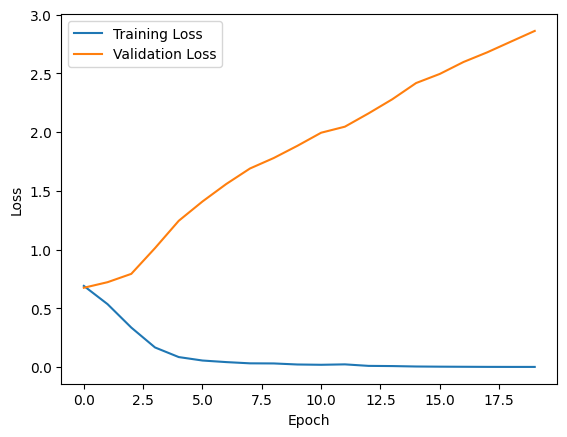

In [ ]:
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

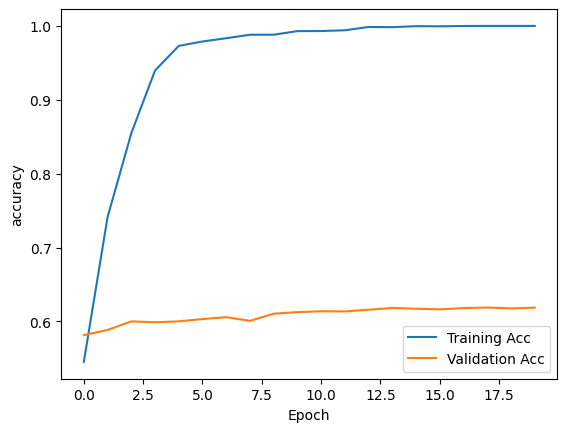

In [ ]:
plt.plot(history['accuracy'], label='Training Acc')
plt.plot(history['val_accuracy'], label='Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model(x_test)
loss = loss_function(y_pred, y_test.reshape(-1,1))
acc =  binary_accuracy(y_pred, y_test.reshape(-1,1))

In [ ]:
print(f'loss: {loss}')
print(f'acc : {acc}')

loss: 2.857560873031616
acc : 0.6246399879455566


This bad results of embeddings is due to small size of data that the models couldnot learn a good representation of these words (word vecctors of the language)